In [1]:
cd cgp-cnn-design

/root/AFS/cgp-cnn-design


[False  True False False False False False False False False False False
 False False False  True False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False  True]
Length of individual active:  6
graph G {
rankdir=TB;
"input-0";
"input-0";
"input-0" -- depth_conv_id_1;
depth_conv_id_1 -- max_pooling_id_15;
depth_conv_id_1 [label=depth_conv];
depth_conv_id_1 [label=depth_conv];
depth_conv_id_1 -- conv_3x3_id_19;
max_pooling_id_15 [label=max_pooling];
max_pooling_id_15 -- sum_id_62;
conv_3x3_id_19 [label=conv_3x3];
conv_3x3_id_19 -- sum_id_62;


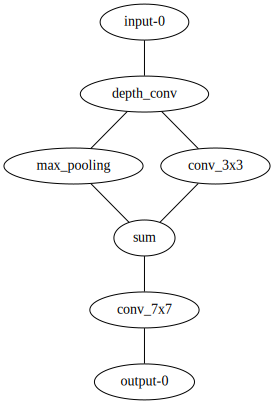

In [25]:
import sys
# sys.path.append('../')

from cgp.cgp import *
from cgp.utils import *
import numpy as np
from IPython.display import SVG, HTML
from IPython.display import Image as Img
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
import io

def conv(input):
    pass

def conv_3x3(input):
    pass

def conv_7x7(input):
    pass

def depth_conv(input):
    pass

def max_pooling(input):
    pass

def sum(a, b):
    pass

def concat(input):
    pass

functions = [conv, conv_3x3, conv_7x7, depth_conv, sum, concat, max_pooling]
inputs = [1, 1, 1, 1, 2, 2, 1]
cfg = CgpConfig(rows=5, cols=20, level_back=10, functions=functions, function_inputs=inputs, mutation_rate=0.2)
cfg.num_input = 1
cfg.num_output = 1
individual = Individual(cfg)
individual.init_genes()
print(individual.active)
print("Length of individual active: ", len(np.where(individual.active == True)[0]))
graph = plot_graph(individual)
print(graph)
SVG(graph.create(prog='dot', format='svg'))

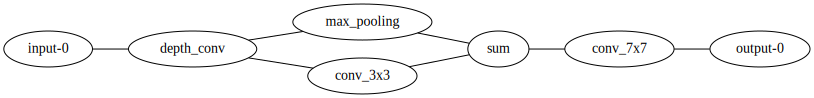

In [26]:
graph = plot_graph(individual, rankdir='LR')
SVG(graph.create(prog='dot', format='svg'))

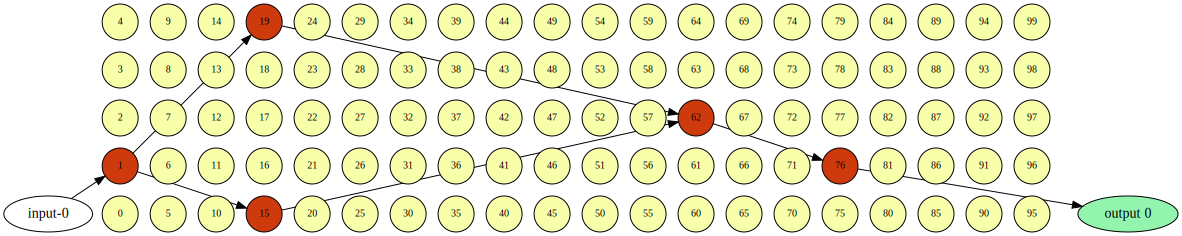

In [27]:
grid = plot_cartesian(individual)
SVG(grid.create(prog='neato', format='svg'))

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Length of individual active:  6
Length of individual active:  7
Length of individual active:  7
Length of individual active:  7
Length of individual active:  7
Length of individual active:  4
Length of individual active:  4
Length of individual active:  4
Length of individual active:  4
Length of individual active:  4
Length of individual active:  4
Length of individual active:  4
Length of individual active:  10
Length of individual active:  10
Length of individual active:  8
Length of individual active:  6
Length of individual active:  6
Length of individual active:  6
Length of individual active:  6
Length of individual active:  6
Length of individual active:  6
Length of individual active:  6
Length of individual active:  6
Length of individual active:  6
Length of individual active:  6
Length of individual active:  6
Length of individual active:  6
Length of individual active:  6
Length of individual active:  6
Length of individual active:  6
Length of individual active:  6
Length

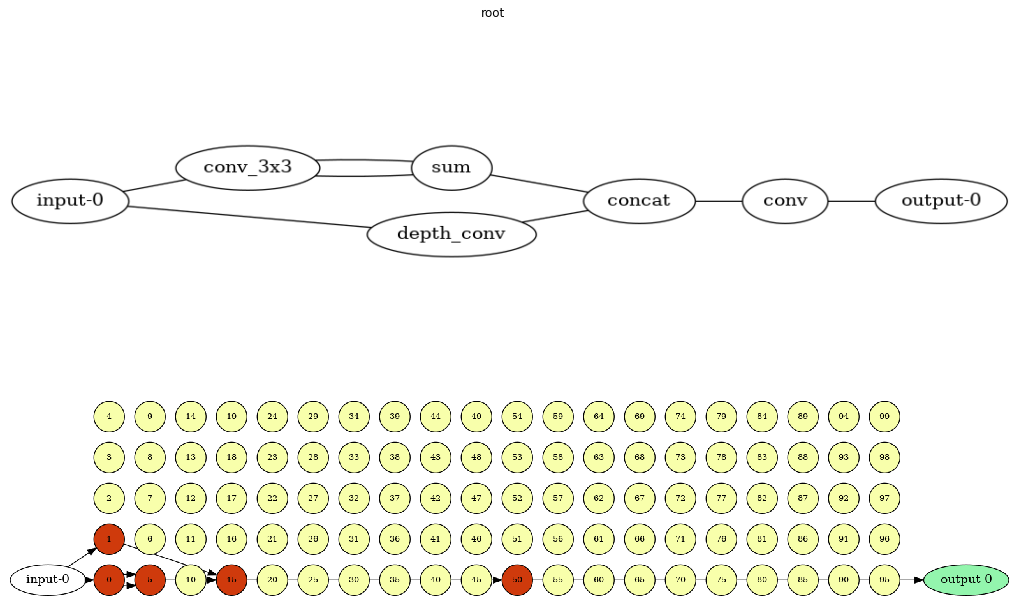

In [28]:
 class SubplotAnimation(animation.TimedAnimation):
    def __init__(self):
        graph = plot_graph(individual, rankdir='LR')
        grid = plot_cartesian(individual)
        graph.set('dpi', 300)
        grid.set('dpi', 300)
        
        self.mut_cnt = 0
        fig = plt.figure(figsize=(18,10))
        plt.subplot(2,1,1)
        self.title = plt.suptitle("root")
        plt.axis('off')
        img_graph = graph.create(prog='dot', format='png')
        self.im_graph = plt.imshow(Image.open(io.BytesIO(img_graph)), animated=True, aspect='equal', interpolation='bilinear')

        plt.subplot(2,1,2)
        plt.axis('off')
        img_grid = grid.create(prog='neato', format='png')
        self.im_grid = plt.imshow(Image.open(io.BytesIO(img_grid)), animated=True)        
        animation.TimedAnimation.__init__(self, fig, interval=2000, blit=True)
    
    def new_frame_seq(self):
        return range(10)

    def _draw_frame(self, framedata):
        self.mut_cnt += 1
        individual.mutate()
        graph = plot_graph(individual, rankdir='LR')
        grid = plot_cartesian(individual)
        img_graph = graph.create(prog='dot', format='png')
        img_grid = grid.create(prog='neato', format='png')
        self.title.text = "mutation %d" % self.mut_cnt
        self.im_graph.set_data(Image.open(io.BytesIO(img_graph)))
        self.im_grid.set_data(Image.open(io.BytesIO(img_grid)))
        self._drawn_artists = [self.im_graph, self.im_grid, self.title]
        

# anim = animation.FuncAnimation(fig, updatefig, init_func=init_func, frames=20, interval=1500, blit=False)
# write = animation.FFMpegWriter(fps=0.5, bitrate=1000, extra_args=['-vcodec', 'libx264'])
# anim.save('anim.mp4', writer=write, dpi=150)
anim = SubplotAnimation()
anim.save('anim.gif', dpi=300, writer='imagemagick')
# plt.close()